<a href="https://colab.research.google.com/github/RahulAdepu1/IT496/blob/main/Assignment_RadarPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import pandas as pd
import math

#Create a dataframe for our alternative analysis matrix
AA=pd.DataFrame(columns=['criteria','weight','ratingA','ratingB','scoreA','scoreB'])

In [28]:
AA['criteria']=['Imporved Productivity','Cost Savings','Risk To Customers','Risk To Organization','Complexity']

In [29]:
#Step 2: identify weights
#weights show relative importance of each criterion
#they must add up to 1 (or 100 if you use percentages)
AA['weight']=[0.1,0.2,0.3,0.25,0.15]

In [30]:
#Step 3: Rate each alternative across all criteria
#Choose a scale: 1-5 or 1-7 or 1-10
#Higher Number: an alternative is doig better regarding a given criterion
AA['ratingA']=[3,4,3,3,2]
AA['ratingB']=[1,3,4,2,2]

#Step 4: Calculate partial scores by multiplying weight * ratings
for index, row in AA.iterrows():
  AA['scoreA'][index]= row['ratingA']*row['weight']
  AA['scoreB'][index]= row['ratingB']*row['weight']

print(AA)

                criteria  weight  ratingA  ratingB scoreA scoreB
0  Imporved Productivity    0.10        3        1    0.3    0.1
1           Cost Savings    0.20        4        3    0.8    0.6
2      Risk To Customers    0.30        3        4    0.9    1.2
3   Risk To Organization    0.25        3        2   0.75    0.5
4             Complexity    0.15        2        2    0.3    0.3


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [31]:
#Step 5: Add partial scores to get the toal scores
#Which solution is the winner? the one with the highest total score
totalScoreA=0
totalScoreB=0
for index, row in AA.iterrows():
  totalScoreA+= row['scoreA']
  totalScoreB+= row['scoreB']

print('The total score for A is {:.2f} and for B is {:.2f}'.format(totalScoreA, totalScoreB))

The total score for A is 3.05 and for B is 2.70


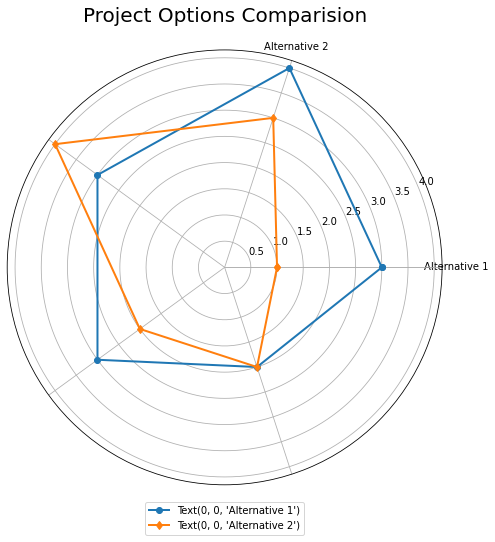

In [36]:
import numpy as np
import matplotlib.pyplot as plt

axisLocations = np.linspace(start=0, stop=2*np.pi, num=len(AA['ratingA']), endpoint=False)
axisLocations = np.concatenate((axisLocations,[axisLocations[0]]))
ratingA = AA['ratingA']
ratingB = AA['ratingB']
ratingACircular = np.concatenate((ratingA,[ratingA[0]]))
ratingBCircular = np.concatenate((ratingB,[ratingB[0]]))

plt.figure(figsize=(8,8))
plt.subplot (polar=True)
plt.plot(axisLocations, ratingACircular,'o-', linewidth=2, label='Alternative 1')
plt.plot(axisLocations, ratingBCircular,'d-', linewidth=2, label='Alternative 2')
plt.title('Project Options Comparision', size=20)
lines, labels = plt.thetagrids (np.degrees (axisLocations), labels=['Alternative 1','Alternative 2'])
# Put a legend below current axis
plt.legend(labels, loc='lower center', borderaxespad=-5)
plt.show()